CNN with CIFAR-10

In [ ]:
import tensorflow as tf
from keras import datasets, models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [ ]:
# CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

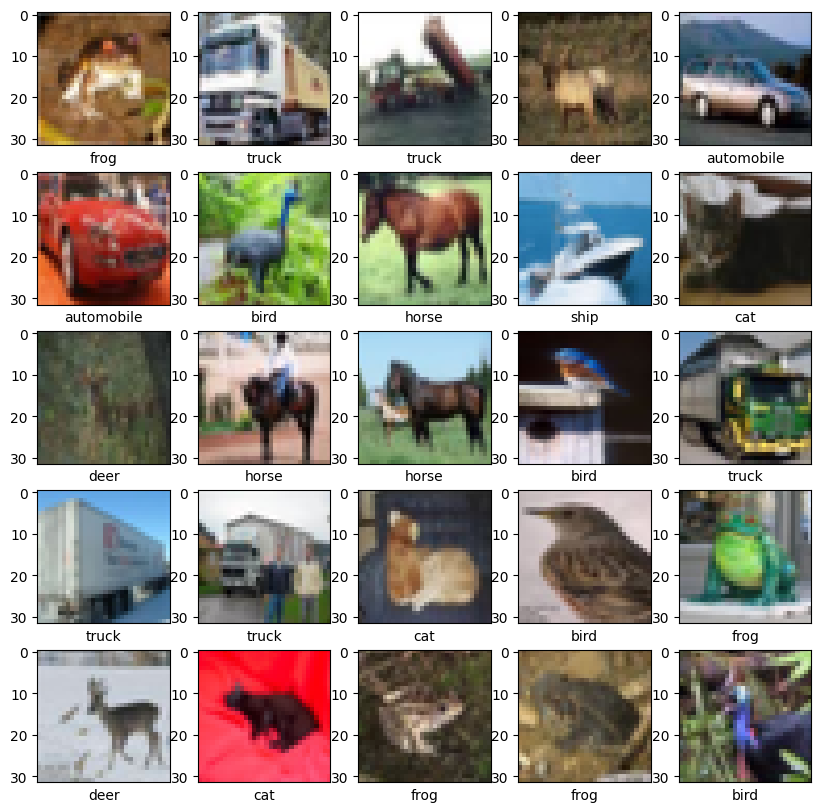

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

In [ ]:
in_shape = train_images[0].shape
in_shape

(32, 32, 3)

In [ ]:
# Model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=in_shape))


In [ ]:
model.output_shape

(None, 30, 30, 64)

- 32x32 => 30x30
- 64 different neurons so 30x30x64 output shape
- the parameters would be 3x3x3+(b=1) = 28 for 1 neuron
- total parameters would be 28*64 = 1792 parameters in total

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
28*64

1792

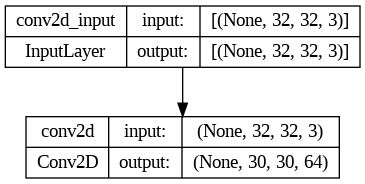

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.add(layers.MaxPool2D((2, 2)))

- 30/4 ~ 15 since maxpooling takes max value of pool_size defined
- In this case (2, 2) decreasing shape by 1/4th

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


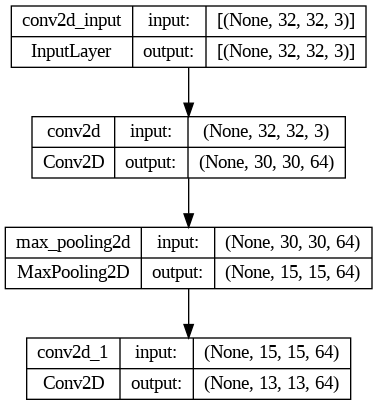

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.add(layers.MaxPool2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


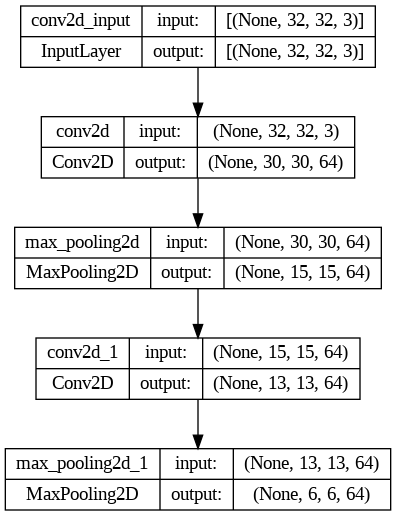

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.add(layers.Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 

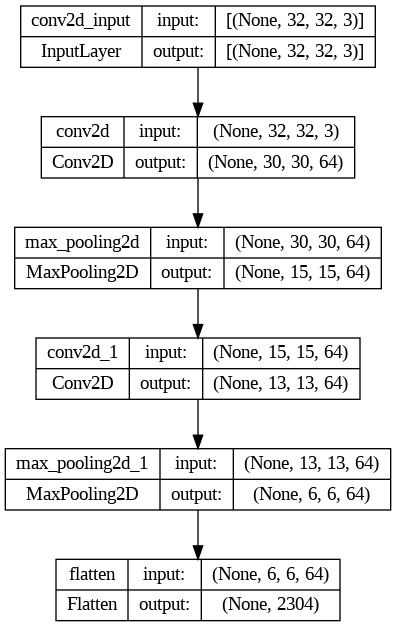

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# model.add(layers.Dense(32, activation='relu'))
# 2304*32+32 # + bias for each 32 neuron
model.add(layers.Dense(256, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [ ]:
model.add(layers.Dropout(0.5))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [ ]:
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

In [ ]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [ ]:
32 * 10 + 10 # + bias for each 10 neuron

330

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=80,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/80
625/625 - 10s - loss: 1.8235 - accuracy: 0.3191 - val_loss: 1.4499 - val_accuracy: 0.4900 - 10s/epoch - 15ms/step
Epoch 2/80
625/625 - 4s - loss: 1.4598 - accuracy: 0.4773 - val_loss: 1.2406 - val_accuracy: 0.5582 - 4s/epoch - 6ms/step
Epoch 3/80
625/625 - 3s - loss: 1.3080 - accuracy: 0.5389 - val_loss: 1.1462 - val_accuracy: 0.5926 - 3s/epoch - 5ms/step
Epoch 4/80
625/625 - 3s - loss: 1.2201 - accuracy: 0.5759 - val_loss: 1.0893 - val_accuracy: 0.6215 - 3s/epoch - 5ms/step
Epoch 5/80
625/625 - 3s - loss: 1.1469 - accuracy: 0.5998 - val_loss: 1.0562 - val_accuracy: 0.6280 - 3s/epoch - 5ms/step
Epoch 6/80
625/625 - 3s - loss: 1.0890 - accuracy: 0.6231 - val_loss: 1.0408 - val_accuracy: 0.6390 - 3s/epoch - 6ms/step
Epoch 7/80
625/625 - 4s - loss: 1.0376 - accuracy: 0.6417 - val_loss: 0.9685 - val_accuracy: 0.6669 - 4s/epoch - 6ms/step
Epoch 8/80
625/625 - 3s - loss: 0.9854 - accuracy: 0.6611 - val_loss: 0.9402 - val_accuracy: 0.6811 - 3s/epoch - 5ms/step
Epoch 9/80
625/625 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_loss, test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.4836 - accuracy: 0.7066


(1.4835975170135498, 0.70660001039505)

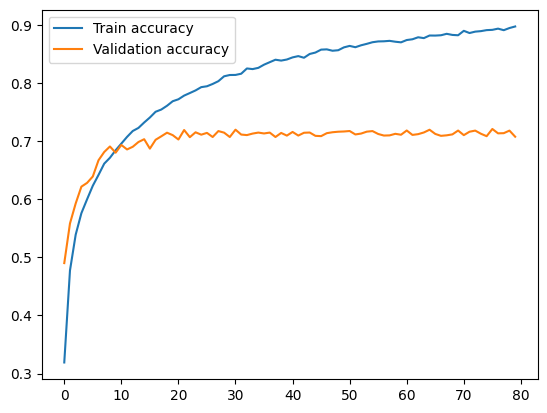

In [ ]:
# Result validation
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

### Model Checkpoint

In [ ]:
# Model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=in_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# If monitor is accuracy, mode should be max or else use auto
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   verbose=True)

mc =ModelCheckpoint('best_model.h5',
                    monitor='val_accuracy',
                    mode='max',
                    verbose=True,
                    save_best_only=True)

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=40,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2,
                    callbacks=[es, mc])

Epoch 1/40

Epoch 1: val_accuracy improved from -inf to 0.46570, saving model to best_model.h5
625/625 - 7s - loss: 1.8119 - accuracy: 0.3600 - val_loss: 1.5181 - val_accuracy: 0.4657 - 7s/epoch - 12ms/step
Epoch 2/40


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.46570
625/625 - 3s - loss: 1.4102 - accuracy: 0.4996 - val_loss: 1.8714 - val_accuracy: 0.3512 - 3s/epoch - 5ms/step
Epoch 3/40

Epoch 3: val_accuracy improved from 0.46570 to 0.51420, saving model to best_model.h5
625/625 - 3s - loss: 1.2380 - accuracy: 0.5692 - val_loss: 1.3718 - val_accuracy: 0.5142 - 3s/epoch - 5ms/step
Epoch 4/40

Epoch 4: val_accuracy improved from 0.51420 to 0.55910, saving model to best_model.h5
625/625 - 3s - loss: 1.1200 - accuracy: 0.6163 - val_loss: 1.3374 - val_accuracy: 0.5591 - 3s/epoch - 5ms/step
Epoch 5/40

Epoch 5: val_accuracy improved from 0.55910 to 0.64220, saving model to best_model.h5
625/625 - 4s - loss: 1.0279 - accuracy: 0.6481 - val_loss: 1.0710 - val_accuracy: 0.6422 - 4s/epoch - 6ms/step
Epoch 6/40

Epoch 6: val_accuracy improved from 0.64220 to 0.67980, saving model to best_model.h5
625/625 - 3s - loss: 0.9603 - accuracy: 0.6716 - val_loss: 0.9538 - val_accuracy: 0.6798 - 3s/epoch - 5ms/step
E

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_loss, test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.9130 - accuracy: 0.7307


(0.9130395650863647, 0.7307000160217285)

In [ ]:
best_model = models.load_model('best_model.h5')
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
test_loss, test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.9130 - accuracy: 0.7307


(0.9130395650863647, 0.7307000160217285)

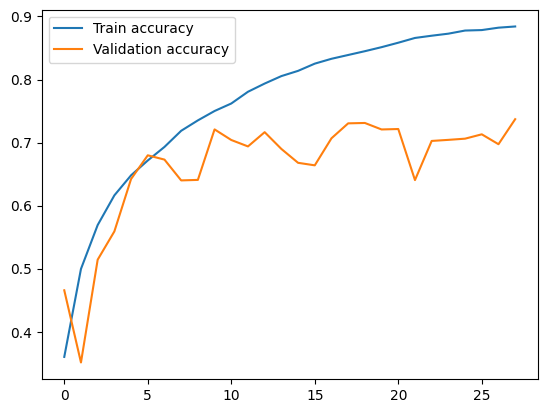

In [ ]:
# Result validation
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()